# Spam quick start

You can find a complete docmumentation about [spam](https://ttk.gricad-pages.univ-grenoble-alpes.fr/spam/index.html) that is able to do more than just 2D images correlation.

Here we present a simple DIC on 2D images.

This tutorial has been tested using [spam 0.6.0.1]

## Preprocessing the image

To comvert **raw** image into **tiff**, we recomande [dcraw](https://www.dechifro.org/dcraw/). It is able to process `CR2`, `NEF`, ... image formats.
`
```{note}
[spam](https://ttk.gricad-pages.univ-grenoble-alpes.fr/spam/index.html) need grayscale image. A way to process the raw image is :

`dcraw -d -T image.NEF`
```

## The images
### The initial and final image for DIC

In [22]:
import tifffile
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
adr_i='/data/Manips/Columnar_Ice/CI23/DIC_Analysis/Test_spam/CI23_set01_001.tiff'
adr_f='/data/Manips/Columnar_Ice/CI23/DIC_Analysis/Test_spam/CI23_set01_027.tiff'

In [19]:
im_i=tifffile.imread(adr_i)
im_f=tifffile.imread(adr_f)

Text(0.5, 1.0, 'final image')

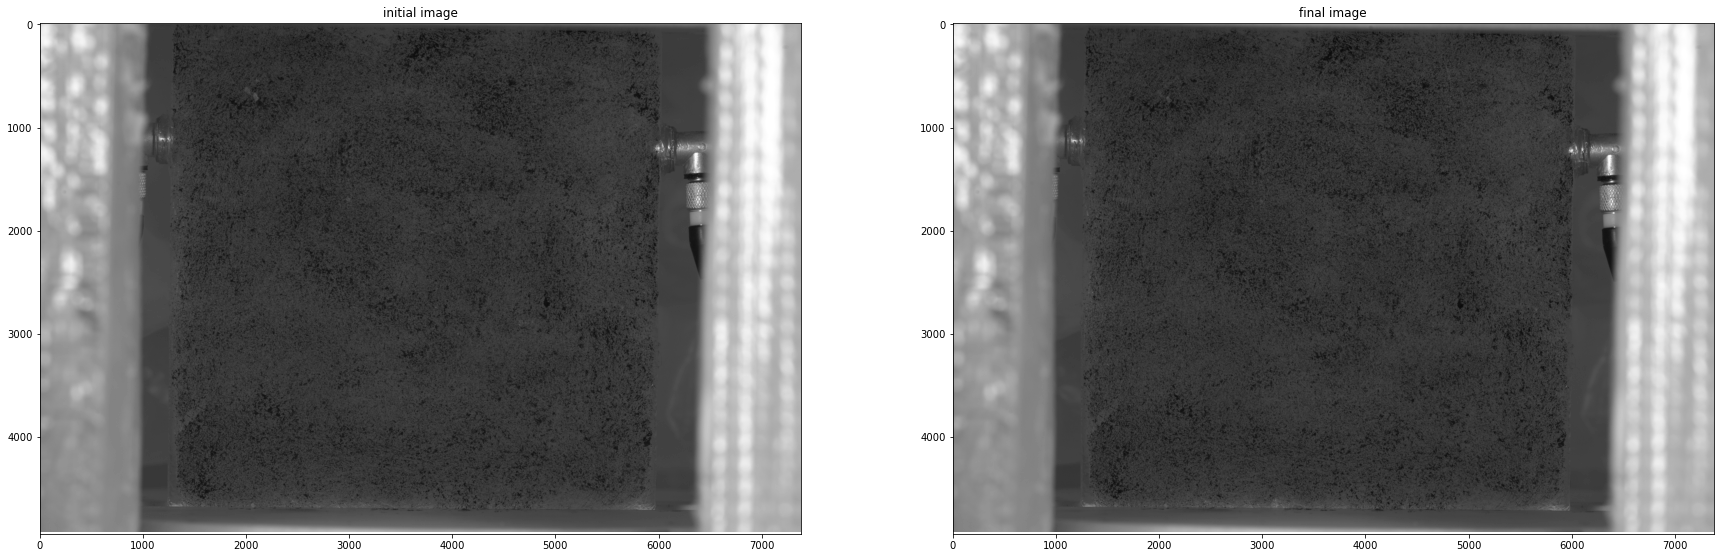

In [28]:
plt.figure(figsize=(30,9.4))
plt.subplot(121)
plt.imshow(im_i,cmap=cm.gray)
plt.axis('equal')
plt.title('initial image')
plt.subplot(122)
plt.imshow(im_f,cmap=cm.gray)
plt.axis('equal')
plt.title('final image')

In [42]:
im_i.shape

(4924, 7378)

### The mask image

In [39]:
adr_m='/data/Manips/Columnar_Ice/CI23/DIC_Analysis/Test_spam/CI23_set01_001_mask.tiff'
im_m=tifffile.imread(adr_m)

Text(0.5, 1.0, 'initial image')

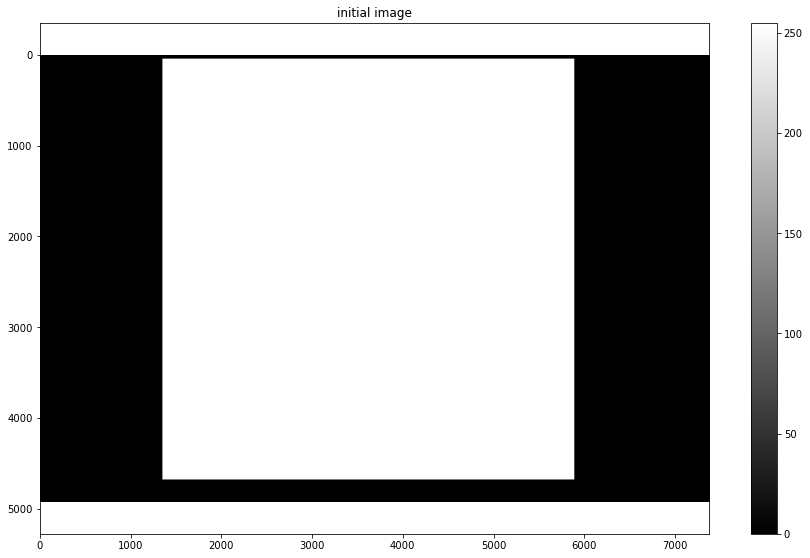

In [40]:
plt.figure(figsize=(15,9.4))
plt.imshow(im_m,cmap=cm.gray)
plt.axis('equal')
plt.colorbar()
plt.title('initial image')

In [41]:
im_m.shape

(4924, 7378)

## The DIC using spam

`mkdir spamcor`

`spam-reg -mf1 CI23_set01_001_mask.tiff -bb 8 -be 2 CI23_set01_001.tiff CI23_set01_027.tiff`

`spam-pixelSearch CI23_set01_001.tiff CI23_set01_027.tiff -hws 15 -ns 30 -sr 0 0 -20 50 -20 20 -vtk -mf1 CI23_set01_001_mask.tiff`

`spam-filterPhiField -pf CI23_set01_001-CI23_set01_027-pixelSearch.tsv -scc -scct 0.99 -cint`

`spam-ldic CI23_set01_001.tiff CI23_set01_027.tiff -pf CI23_set01_001-CI23_set01_027-pixelSearch-filtered.tsv -hws 15 -vtk`

`spam-filterPhiField -pf CI23_set01_001-CI23_set01_027-ldic.tsv -srs -cint -vtk -notsv -od spamcor/`

Need to build a function to import data from spam in xarray-dic